In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay,
                             roc_curve, auc, accuracy_score, roc_auc_score, classification_report)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [15]:
voice_clip_meta_data = pd.read_csv("/Users/Owner/Desktop/MATH485/voice_clip_selected/voice_clip_meta_data.csv")
voice_feature = pd.read_csv("/Users/Owner/Desktop/MATH485/voice_clip_selected/voice_feature_20241022.csv")

In [16]:
age_name = ['teens', 'twenties','thirties', 'forties', 'fifties', 'sixties', 'seventies', 'eighties', 'nineties']
age_value = range(1, 10)  # 1 to 9
age_dict = dict(zip(age_name, age_value))

gender_name = ["male_masculine", "female_feminine"]
gender_value = [0, 1]  # 0 for male, 1 for female
gender_dict = dict(zip(gender_name, gender_value))

# Map age and gender to numerical values)
voice_feature['age'] = voice_feature['age'].map(age_dict)
voice_feature['gender'] = voice_feature['gender'].map(gender_dict)

# Define subsets
col_list_mfcc = ['mfcc_00', 'mfcc_01', 'mfcc_02', 'mfcc_03', 'mfcc_04', 'mfcc_05', 'mfcc_06', 'mfcc_07', 'mfcc_08', 'mfcc_09', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18', 'mfcc_19', 'mfcc_20', 'mfcc_21', 'mfcc_22', 'mfcc_23', 'mfcc_24']
col_list_f0 = ['f0_mean', 'f0_std','f0_var','f0_min','f0_max','f0_skew', 'f0_kurtosis']
col_list_zcr = ['zcr_mean','zcr_std','zcr_var','zcr_min','zcr_max','zcr_skew','zcr_kurtosis']

# Combine the selected features for clustering
X = voice_feature[col_list_f0 + col_list_mfcc + col_list_zcr]

In [17]:
# Check for missing values in the dataset
print(X.isnull().sum())  

# Impute missing values using the mean 
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the imputed data using MinMaxScaler
scaler = MinMaxScaler().fit(X_imputed)
X_scaled = scaler.transform(X_imputed)



f0_mean         15
f0_std          15
f0_var          15
f0_min          15
f0_max          15
f0_skew         16
f0_kurtosis     16
mfcc_00          0
mfcc_01          0
mfcc_02          0
mfcc_03          0
mfcc_04          0
mfcc_05          0
mfcc_06          0
mfcc_07          0
mfcc_08          0
mfcc_09          0
mfcc_10          0
mfcc_11          0
mfcc_12          0
mfcc_13          0
mfcc_14          0
mfcc_15          0
mfcc_16          0
mfcc_17          0
mfcc_18          0
mfcc_19          0
mfcc_20          0
mfcc_21          0
mfcc_22          0
mfcc_23          0
mfcc_24          0
zcr_mean         0
zcr_std          0
zcr_var          0
zcr_min          0
zcr_max          0
zcr_skew         0
zcr_kurtosis     0
dtype: int64


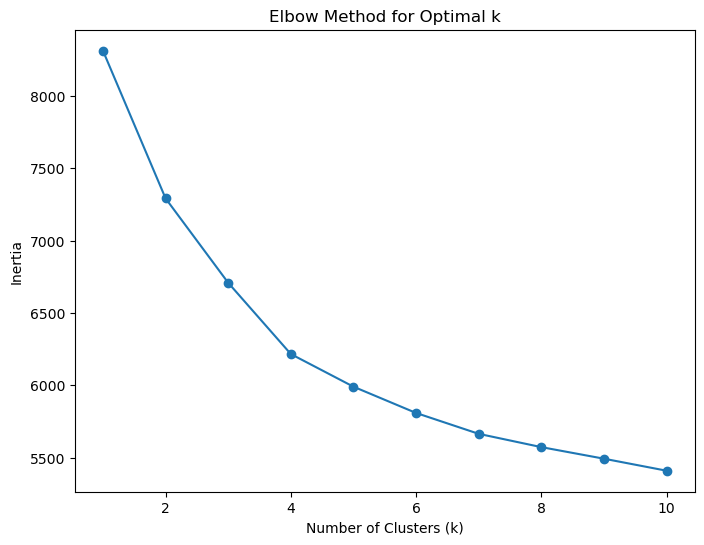

In [18]:
# Apply KMeans clustering with different values of k
inertia = []
k_range = range(1, 11)  # Testing k from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow Method to find the optimal k
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

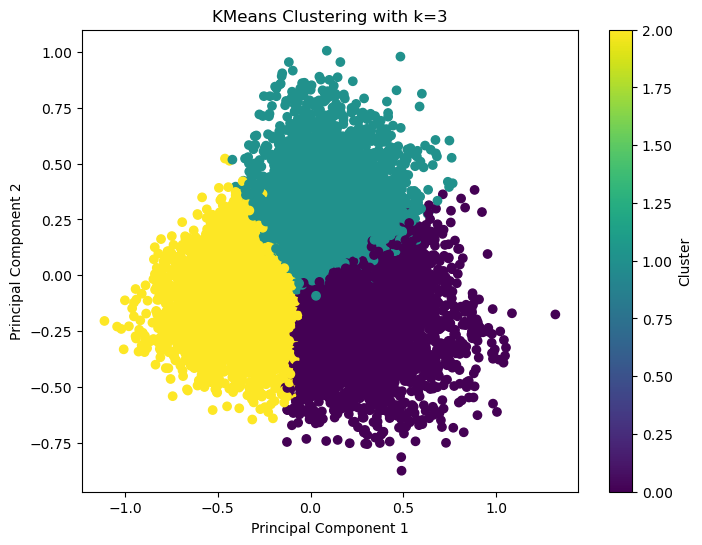

In [19]:
# Based on the elbow method, choose the optimal k (choosing k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clustered data in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title(f'KMeans Clustering with k={optimal_k}')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

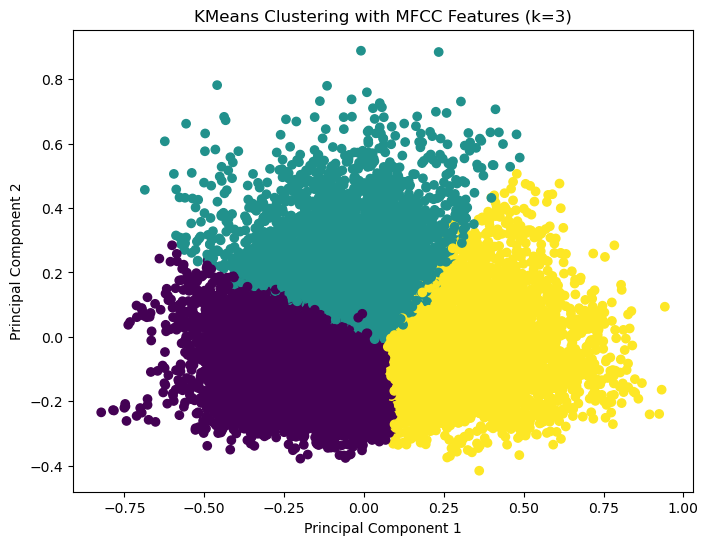

In [20]:
# Experiment with only MFCC features
X_mfcc = voice_feature[col_list_mfcc]
X_mfcc_imputed = imputer.fit_transform(X_mfcc)  # Impute missing values in MFCC

# Apply scaler for MFCC features separately
scaler_mfcc = MinMaxScaler().fit(X_mfcc_imputed)  # Fit scaler on MFCC features only
X_mfcc_scaled = scaler_mfcc.transform(X_mfcc_imputed)  # Scale the MFCC features

# Apply KMeans on MFCC features
kmeans_mfcc = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans_mfcc = kmeans_mfcc.fit_predict(X_mfcc_scaled)

# Visualizing clustering on MFCC features
X_pca_mfcc = pca.fit_transform(X_mfcc_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_mfcc[:, 0], X_pca_mfcc[:, 1], c=y_kmeans_mfcc, cmap='viridis')
plt.title(f'KMeans Clustering with MFCC Features (k={optimal_k})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


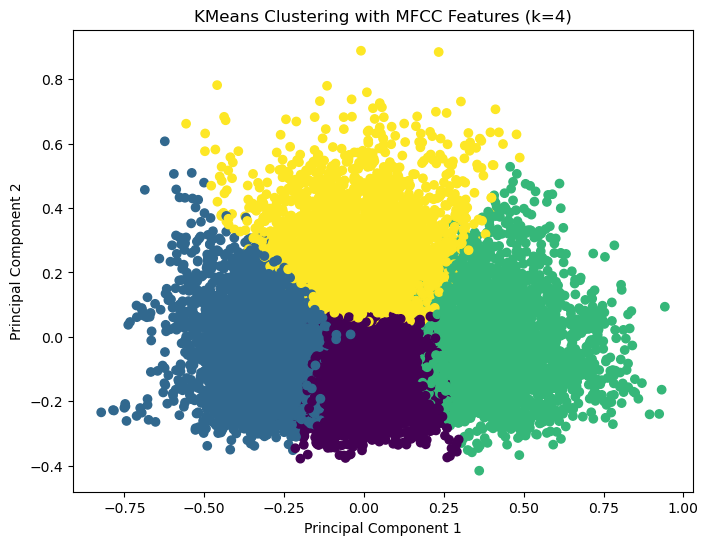

In [21]:
# Experiment with using only MFCC features for clustering
X_mfcc = voice_feature[col_list_mfcc]
X_mfcc_imputed = imputer.fit_transform(X_mfcc)  # Impute missing values in MFCC

# Apply scaler for MFCC features separately
scaler_mfcc = MinMaxScaler().fit(X_mfcc_imputed)  # Fit scaler on MFCC features only
X_mfcc_scaled = scaler_mfcc.transform(X_mfcc_imputed)  # Scale the MFCC features

# Apply KMeans on MFCC features
optimal_k = 4  # Assuming 4 as an example, use the value from the elbow method
kmeans_mfcc = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans_mfcc = kmeans_mfcc.fit_predict(X_mfcc_scaled)

# Visualizing clustering on MFCC features using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_mfcc = pca.fit_transform(X_mfcc_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_mfcc[:, 0], X_pca_mfcc[:, 1], c=y_kmeans_mfcc, cmap='viridis')
plt.title(f'KMeans Clustering with MFCC Features (k={optimal_k})')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


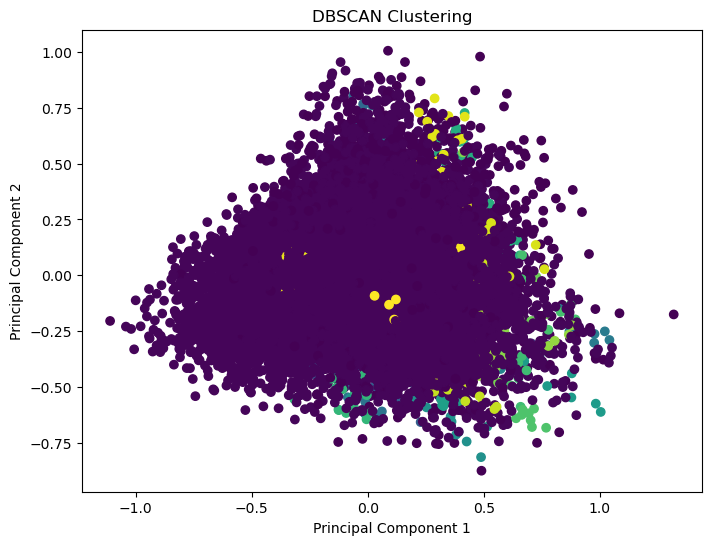

In [22]:
# Try other clustering methods (e.g., DBSCAN) for comparison
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

# Visualizing DBSCAN clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()